<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/2_NLP_%ED%95%9C%EA%B5%AD%EC%96%B4%ED%8A%B9%EC%A7%95_%ED%86%A0%ED%81%B0%ED%99%94_%EC%9E%84%EB%B2%A0%EB%94%A9_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국어의 어려운점 및 난이도

---

- 자연어 처리의 난이도(한국어)
  - 문장내 모호성이 부과(정보가 부족해서)
    - 축구공을 `차`던 `차`에 `차`가 마시고 싶어서 카페에 가는 `차`안에서 그에게 고백했다. 그런데 `차`였다.
    - 번역
      - 파파고
      - 구글
      - 카카오
    - 언어는 최소한 표현으로 최대한 정보를 표현하고자하는 경향이 존재
  
  - 불연속 데이터
    - 자연어는 불연속데이터로 간주 -> 단어 임베딩 -> 정보가 압축 -> 정보손실발생 -> 연속적인 데이터로 변형이 됨
  
  - 다양한 표현
    - 1개의 사물을 보고 표현하는 방식이 다양하다. (모두 다를 수 있다)

  - 한국어
    - 교착어
      - 어근에 접사가 붙어서 의미와 문법적기능 부여
        - 형태소 분석기를 통해서 분리과정 수행
    - 띄어쓰기
      - 사람마다 제각각, 다 붙여도 해석 가능
      - 형태소 분석기를 통해서 분리
    - 평서문, 의문문 문제
      - ?이 없으면 애매모호함.
      - 밥먹었어, 밥 먹었어?
      - 문장의 전후 관계를 살펴봐야 뉘앙스가 이해
    - 주어 생략
      - 동사를 중시한다 => 주어를 생략하는 경우가 존재
    - 한자 기반 언어
      - 한자 조합이 많다.
      - 한글(표음문자), 한자(표의문자)를 대체 정보손실이 발생
      


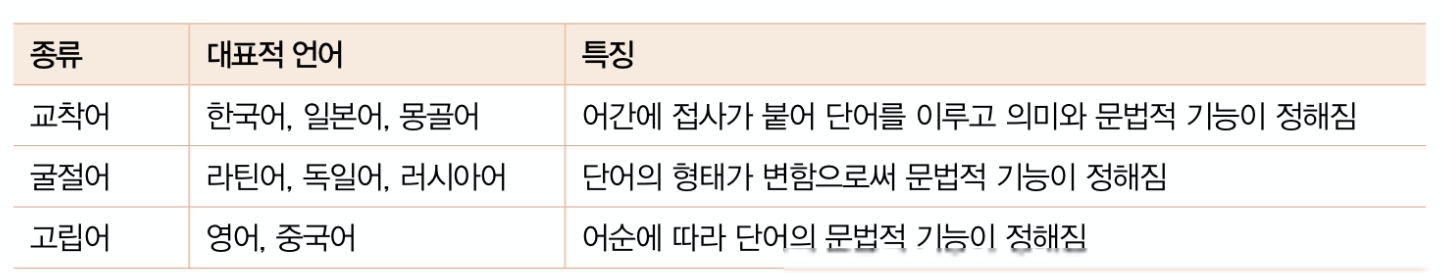

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/딥러닝_NLP/rnn/언어종류.png')

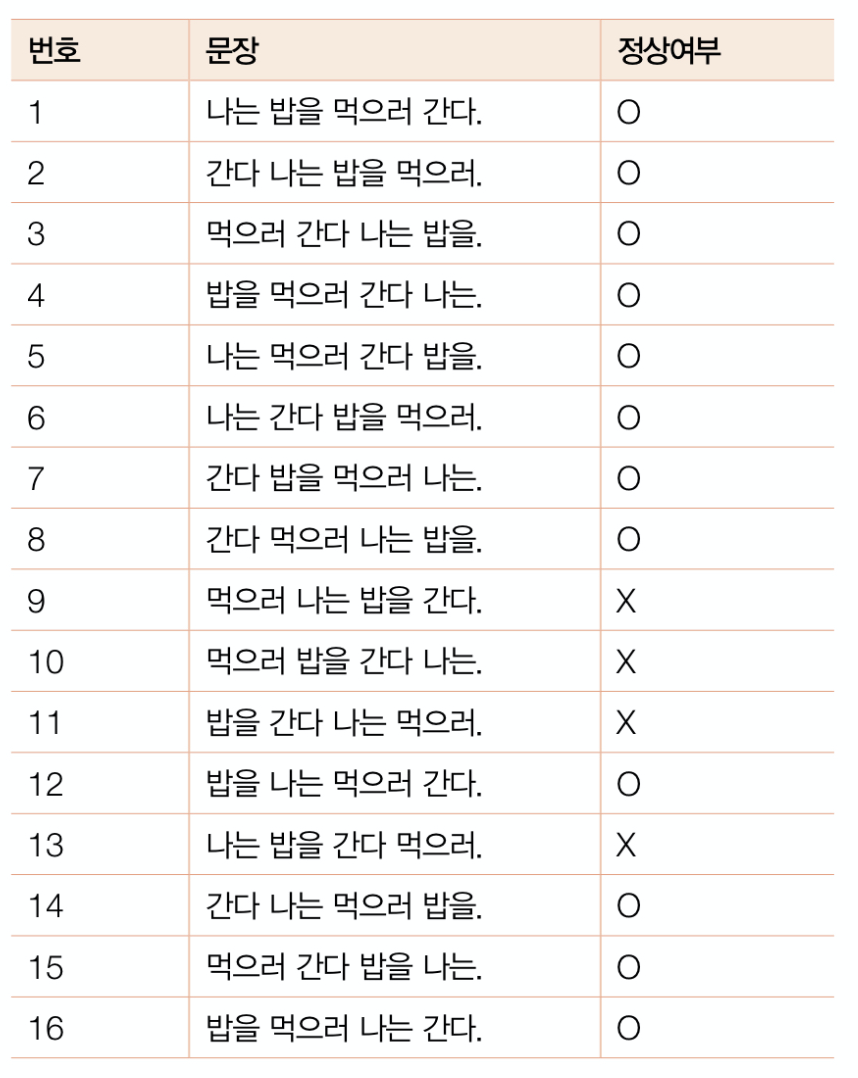

In [ ]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/딥러닝_NLP/rnn/같은의미.png')

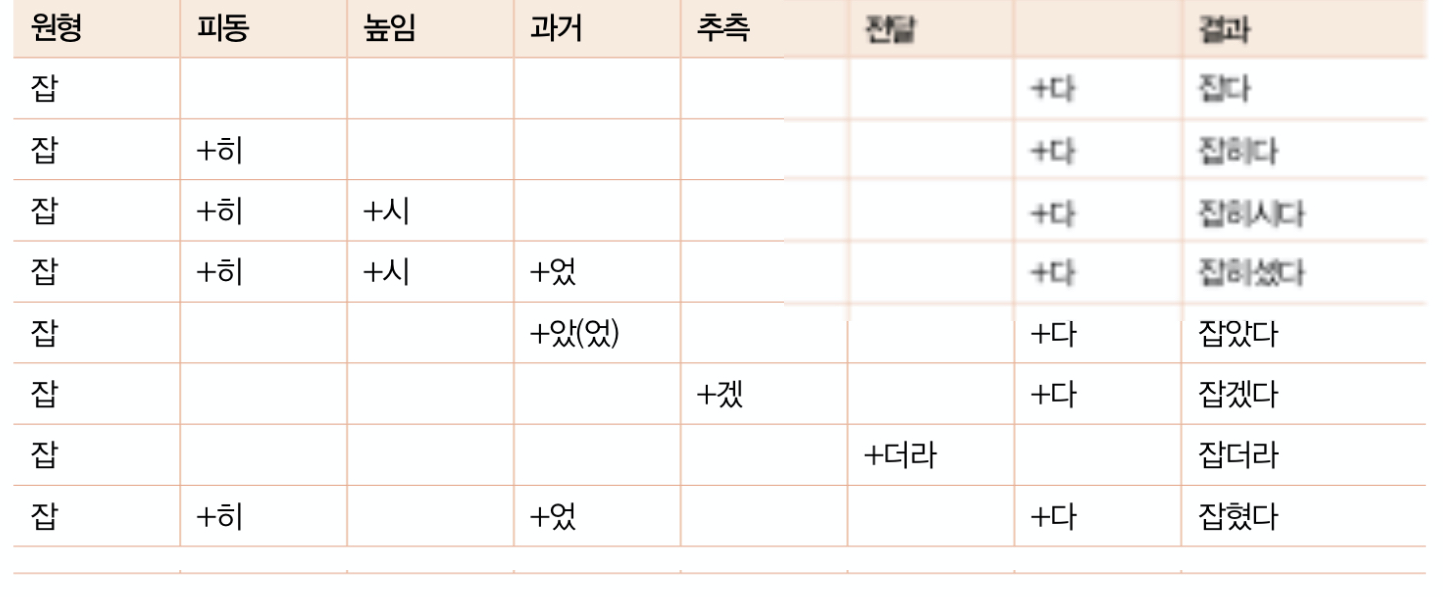

In [ ]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/딥러닝_NLP/rnn/교착어복잡함.png')

# 토큰화

- 영어권 : nltk
- 한국어 : Konlpy
  - 형태소 분석기
  - OKt, Mecab, Hannanum, kkma,.... : 자바기반 시작
  - [한국형 형태소 분석기 비교 분석표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
- 용어정리
  - 토큰(token) : 더이상 나눠질수 없는 단위
    - 영미권 :  단어
    - 한국어(교착어) => 품사(혹은 형태소 단위)
      - 형태소 분절 -> 공백기반으로 쪼개기
    - 토큰화
      - 문장 => 토큰을 추출 => 사전화 완료
    - 토크나이저(tokenizer)
      - 토큰화를 수행하는 주체, 통상클래스로 제공
      - 텍스트 => 학습가능한 형태(백터:문장기준)로 가공하는 주체
      


# Web UI

In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 M

# 카운트 기반 언어표현 (Count based word Representation)
- TF-IDF (빈도로 구성)


- 국소 표현 방법 (local)
  - 단어(토큰)을 새로 만나면 번호 부여
    - 처음 만나는 단어 -> 1, 2, 3, .... 순차적으로 부여
  - 뉘앙스 X
  - 이산 표현
  - BoW, DTM, TF-IDF
- 분산 표현 방법 (distributed)
  - 단어 표현시 주변을 참고, 단어를 표현
  - 뉘앙스가 있다
  - dog 혹은 cat 주변에 cute, lovely 등등 자주 등장한다면, 이런 단어에 가중치를 부여, 비중을 둔다
  - 연속형 부여
  - Word2Vec, Fasttext, GloVe


## TF-IDF
- 단어 빈도 - 역문서 빈도 표현
  - 2개의 정보를 혼합해서, 단어를 수치화 사전화 처리 했음
  - Term Frequency - Inverse Document Frequency
- 정의
  - 단어 빈도(전체텍스트(혹은 한개 문장) 에서 단어가 몇번 나오는가), 역외 빈도(여러문장에서 이 단어가 몇번 나오는가)
  - 각 단어들마다 중요한 척도를 가중치로 주는 방식
- 활용
  - 문서의 유사도 검사
  - 검색시스템의 검색결과 중요도 표시
  - 문장내 혹은 문서내 단어 중요도 저치
  

In [ ]:
import pandas as pd
from math import log

In [ ]:
# 말뭉치 준비 => 소량의 짧은 문장, 더미데이터, 중복 단어를 일부러 표현, 형태소 단위 분절 배제
docs = [
    '맛있는 과일 사과',
    '맛있는 음식 돈까스',
    '맛있는 치즈 돈까스 돈까스',
    '저는 과일이 좋아요'
]
# 모든 코퍼스에서 공백 단위로 쪼개서, 한개의 단어만 리스트에 담아서 출력 -> split 할 때 공백이면 자동
word_list  = [ word for doc in docs for word in doc.split(' ')]
vocab =list(set([ word for doc in docs for word in doc.split(' ')]))
vocab.sort()
print(vocab)

['과일', '과일이', '돈까스', '맛있는', '사과', '음식', '저는', '좋아요', '치즈']


In [ ]:
# 1. 문장의 수
N = len(docs)
N

4

In [ ]:
docs[2].count('돈까스'), docs[2].count('함박')

(2, 0)

In [ ]:
# 2. TF를 구한다 - 한개의 문장내에서 사전에 등록된 토큰의 카운트 계산
def tf(token:str, doc:str)->int:
  '''
      - token : 한개의 토큰
      - doc   : 한개의 문장

  '''
  return doc.count(token)

tf('돈까스', docs[2])

2

In [ ]:
# 3. IDF 함수 => 모든 문장을 순회, 문장내 특정 토큰이 발견되면 +1 증가 -> 연산수행(대기)
#    한개의 문장내에 토큰이 여러번 나와도 +1회로 체크 -> 나중에 TFIDF  머신러닝에서 사용해서 비교
def idf(token, docs):
    '''
     - token : 한개의 토큰
     - docs : 모든 문장(코퍼스)
    '''
    cnt = 0
    for doc in docs:
        cnt += token in doc # 문장안에 token이 1개가 있던, 2개가 있던 +1만 되는것

    return log(N/(cnt+1))
    pass

idf('돈까스', docs), idf('맛있는', docs)

(0.28768207245178085, 0.0)

In [ ]:
# 4. tf-idf 계산
def tf_idf(token, doc, docs):
  return tf(token, doc) *idf(token,docs)

#### 문장의 벡터화


In [ ]:
# 빈도를 DF로 표현

results = []
for i in range(N): # 문장의 개수만큼 반복
  results.append( list( ))
  doc = docs[i] # 문장 한개 추출
  # 토큰 개수만큼 반복 => 사전의 총수
  cnt = 0
  for j in range(len(vocab)):
    token = vocab[j]  # 토클 추출
    # 한개의 문장내에서 특정토큰이 몇개 나오는지 계산
    results[-1].append(tf(token, doc))

tf_idf_df = pd.DataFrame(results, columns = vocab)
tf_idf_df


,과일,과일이,돈까스,맛있는,사과,음식,저는,좋아요,치즈
0,1,0,0,1,1,0,0,0,0
1,0,0,1,1,0,1,0,0,0
2,0,0,2,1,0,0,0,0,1
3,1,1,0,0,0,0,1,1,0


In [ ]:
# idf
res    = [ idf(token, docs) for token in vocab]
idf_df =  pd.DataFrame(res, index= vocab , columns = ['IDF'])
idf_df

,IDF
과일,0.287682
과일이,0.693147
돈까스,0.287682
맛있는,0.000000
사과,0.693147
음식,0.693147
저는,0.693147
좋아요,0.693147
치즈,0.693147


# ML로 처리

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# min_df=2 => 1회만 나오는 토큰은 배제
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')
tf_idf_vec = vectorizer.fit(docs)

In [ ]:
tf_idf_vec.vocabulary_

{'맛있는': 3,
 '과일': 0,
 '사과': 4,
 '음식': 5,
 '돈까스': 2,
 '치즈': 8,
 '저는': 6,
 '과일이': 1,
 '좋아요': 7}

In [ ]:
# tf_idf 계산값
X = tf_idf_vec.transform(docs)
X.shape

(4, 9)

In [ ]:
pd.DataFrame( X.toarray(), columns=vocab )  #  문장을 벡터로 표시하였다.

,과일,과일이,돈까스,맛있는,사과,음식,저는,좋아요,치즈
0,0.644503,0.00000,0.000000,0.411378,0.644503,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.00000,0.553492,0.448100,0.000000,0.702035,0.00000,0.00000,0.000000
2,0.000000,0.00000,0.799093,0.323467,0.000000,0.000000,0.00000,0.00000,0.506774
3,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000


# TF-IDF 기반 벡터 유사도를 이용한 챗봇 구현

- 토큰화, 임베딩 : TF-IDF
- gradio,        : web ui 데모 구성
- flask, javascript, bootstrap, socketio : 웹 챗봇
- 챗봇 시트 : git에서 받을 예


# 데이터 획득

In [ ]:
!pip install -q Korpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
from Korpora import Korpora

Korpora.corpus_list()


{'kcbert': 'beomi@github 님이 만드신 KcBERT 학습데이터',
 'korean_chatbot_data': 'songys@github 님이 만드신 챗봇 문답 데이터',
 'korean_hate_speech': '{inmoonlight,warnikchow,beomi}@github 님이 만드신 혐오댓글데이터',
 'korean_parallel_koen_news': 'jungyeul@github 님이 만드신 병렬 말뭉치',
 'korean_petitions': 'lovit@github 님이 만드신 2017.08 ~ 2019.03 청와대 청원데이터',
 'kornli': 'KakaoBrain 에서 제공하는 Natural Language Inference (NLI) 데이터',
 'korsts': 'KakaoBrain 에서 제공하는 Semantic Textual Similarity (STS) 데이터',
 'kowikitext': 'lovit@github 님이 만드신 wikitext 형식의 한국어 위키피디아 데이터',
 'namuwikitext': 'lovit@github 님이 만드신 wikitext 형식의 나무위키 데이터',
 'naver_changwon_ner': '네이버 + 창원대 NER shared task data',
 'nsmc': 'e9t@github 님이 만드신 Naver sentiment movie corpus v1.0',
 'question_pair': 'songys@github 님이 만드신 질문쌍(Paired Question v.2)',
 'modu_news': '국립국어원에서 만든 모두의 말뭉치: 뉴스 말뭉치',
 'modu_messenger': '국립국어원에서 만든 모두의 말뭉치: 메신저 말뭉치',
 'modu_mp': '국립국어원에서 만든 모두의 말뭉치: 형태 분석 말뭉치',
 'modu_ne': '국립국어원에서 만든 모두의 말뭉치: 개체명 분석 말뭉치',
 'modu_spoken': '국립국어원에서 만든 모두의 말뭉치: 구어 

In [ ]:
#Korpora.load('korean_chatbot_data')
!curl https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv > ChatbotData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  868k  100  868k    0     0  4077k      0 --:--:-- --:--:-- --:--:-- 4079k


In [ ]:
chatbot_df = pd.read_csv('ChatbotData.csv')
chatbot_df.head(2)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0


## 형태소 분석기를 이용하여 분절 수행

In [ ]:
!pip install konlpy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 19.4 MB/s eta 0:00:00


In [ ]:
# 도구 생성
from konlpy.tag import Okt
# 분절도구
okt = Okt()

# 한글(교착어) -> 분절도구 -> 명사 + 조사 분해하는 등 품사 분해
chatbot_df.Q

0                         12시 땡!
1                    1지망 학교 떨어졌어
2                   3박4일 놀러가고 싶다
3                3박4일 정도 놀러가고 싶다
4                        PPL 심하네
                  ...           
11818             훔쳐보는 것도 눈치 보임.
11819             훔쳐보는 것도 눈치 보임.
11820                흑기사 해주는 짝남.
11821    힘든 연애 좋은 연애라는게 무슨 차이일까?
11822                 힘들어서 결혼할까봐
Name: Q, Length: 11823, dtype: object

In [ ]:
# 한글(교착어) -> 분절도구 -> 명사 + 조사 분해하는 등 품사 분해 -> 질문만 수행
chatbot_df['Q'] = chatbot_df.Q.apply(lambda x : ' '.join(okt.morphs(x)))

In [ ]:
chatbot_df

,Q,A,label
0,12시 땡 !,하루가 또 가네요.,0
1,1 지망 학교 떨어졌어,위로해 드립니다.,0
2,3 박 4일 놀러 가고 싶다,여행은 언제나 좋죠.,0
3,3 박 4일 정도 놀러 가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐 보는 것 도 눈치 보임 .,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐 보는 것 도 눈치 보임 .,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남 .,설렜겠어요.,2
11821,힘든 연애 좋은 연애 라는 게 무슨 차이 일까 ?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [ ]:
chatbot_df['Q']

0                            12시 땡 !
1                       1 지망 학교 떨어졌어
2                    3 박 4일 놀러 가고 싶다
3                 3 박 4일 정도 놀러 가고 싶다
4                            PPL 심하네
                    ...             
11818              훔쳐 보는 것 도 눈치 보임 .
11819              훔쳐 보는 것 도 눈치 보임 .
11820                   흑기사 해주는 짝남 .
11821    힘든 연애 좋은 연애 라는 게 무슨 차이 일까 ?
11822                    힘들어서 결혼 할까봐
Name: Q, Length: 11823, dtype: object

## 코퍼스  -> 사전화 -> 백터화 -> 임베딩


In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 토크나이저 도구 생성
vectorizer = TfidfVectorizer(min_df =1 , decode_error='ignore')
# 훈련 및 변환 처리
# X = vectorizer.fit_transform( chatbot_df.Q)
vec = vectorizer.fit(chatbot_df.Q) # vec 은 특징을 가지고있는 상태
print('사전의 수',len(vec.vocabulary_))
X = vec.transform(chatbot_df.Q)    # X 는 벡터화되어서 다루기 쉬운 상태
print(vec)
print(X)
# 11823x8195
# 문장 길이(백터 크기) = 8195.CSR로 압축표현됨
# 이 데이터는 일반적으로 데이터의 위치와 해당 위치의 값을 나타내는 방식으로 표현됩니다

사전의 수 8195
TfidfVectorizer(decode_error='ignore')
  (0, 9)	1.0
  (1, 7634)	0.504188395025858
  (1, 6685)	0.6606141711800418
  (1, 2116)	0.5562220592149825
  (2, 4402)	0.37617014701118967
  (2, 1337)	0.5256771329405711
  (2, 67)	0.45071976251007173
  (2, 39)	0.6156389104692991
  (3, 6294)	0.4696922093868501
  (3, 4402)	0.33209438026826743
  (3, 1337)	0.4640836681808927
  (3, 67)	0.39790903503299657
  (3, 39)	0.5435046456125388
  (4, 4387)	0.6918301852717257
  (4, 56)	0.7220602431562686
  (5, 7170)	0.51130750497155
  (5, 2455)	0.6205370082617122
  (5, 57)	0.5945573620243652
  (6, 7170)	0.6520305994091782
  (6, 57)	0.7581926519256883
  (7, 7623)	0.38197197779347714
  (7, 2503)	0.6305236026321667
  (7, 63)	0.47151494188693466
  (7, 58)	0.48395356624541336
  (8, 7554)	0.26790218126491344
  :	:
  (11817, 7520)	0.3770588758771893
  (11817, 5101)	0.5539309810351971
  (11817, 4409)	0.3659652983794756
  (11817, 3782)	0.3446353033826832
  (11818, 8094)	0.538068891068615
  (11818, 3366)	0.53806889

In [ ]:
X

<11823x8195 sparse matrix of type '<class 'numpy.float64'>'
	with 39355 stored elements in Compressed Sparse Row format>

In [ ]:
# 데모 데이터 확인
question = '오늘 저녁은 어떤 것을 먹을까요?'
kor_senetencet_transform = lambda x: ' '.join(okt.morphs(x))
kor_senetencet_transform(question)

q_vec = vec.transform([kor_senetencet_transform(question)])
q_vec

<1x8195 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
# 백터 내용 확인
# TF-IDF 때문에 0과 1이 아닌 다른것이 계산값으로 세팅
import numpy as np
np.unique(q_vec.toarray())


array([0.        , 0.43894788, 0.58691653, 0.68033355])

In [ ]:
#  향후 유사 질문을 빠르게 찾는 방법 -> 데이터가 전체 벡터로 구축되어있으면 된다! -> 백터DB 사용 필요
# chatbot_df['Q'] => 백터화 => 특정칼럼에 추가
chatbot_df['Q_vec'] = chatbot_df.Q.apply(lambda x: vec.transform([x]).toarray()[0] )
chatbot_df


,Q,A,label,Q_vec
0,12시 땡 !,하루가 또 가네요.,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1 지망 학교 떨어졌어,위로해 드립니다.,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3 박 4일 놀러 가고 싶다,여행은 언제나 좋죠.,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3 박 4일 정도 놀러 가고 싶다,여행은 언제나 좋죠.,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,PPL 심하네,눈살이 찌푸려지죠.,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
11818,훔쳐 보는 것 도 눈치 보임 .,티가 나니까 눈치가 보이는 거죠!,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11819,훔쳐 보는 것 도 눈치 보임 .,훔쳐보는 거 티나나봐요.,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11820,흑기사 해주는 짝남 .,설렜겠어요.,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11821,힘든 연애 좋은 연애 라는 게 무슨 차이 일까 ?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
chatbot_df['Q_vec'][1]

array([0., 0., 0., ..., 0., 0., 0.])

# 유사도 계산
- 텍스트가 원 데이터 -> 문장을 벡터화 할때 단어 빈도로 계산하는 데이터를 이용하여 코사인 유사도를 활용한다.

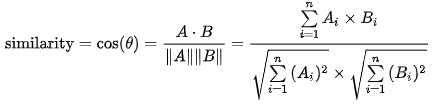

In [ ]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/딥러닝_NLP/rnn/코사인유사도.png')

- 텍스트가 원 데이터 -> 문장을 백터화 할때 단어 빈도로 계산하는 데이터를 이용하여 코사인 유사도를 활용

- 해석
    - −1은 서로 완전히 반대되는 경우
    - 0은 서로 독립적인 경우
    - 1은 서로 완전히 같은 경우를 의미

In [ ]:
# 유사도 커스텀 함수 : numpy, scipy, sklearn, tensorflow/pytorch 있지 않을까?
def cos_sim(a_vec, b_vec):
  '''
     -  a_vec, b_vec : 백터
      - a_vec: 사용시 질문을 백터화 한 데이터
      - b_vec: 챗봇 시트에 있는 질문목록 Q_vec 하나하
     - 공식기반
        - 분자 : 두 백터의 내적
        - 분모 : (개별 백터의 요소들의 제곱의 총합의 루트)*(개별 백터의 요소들의 제곱의 총합의 루트)

  '''

  return np.dot(a_vec, b_vec)/(np.linalg.norm(a_vec)*np.linalg.norm(b_vec))

# 테스트
my_vec = q_vec.toarray()[0]
chatbot_sheet_vec = chatbot_df['Q_vec'][100]
cos_sim(my_vec, chatbot_sheet_vec ),question,  chatbot_df['Q'][100]

(0.0, '오늘 저녁은 어떤 것을 먹을까요?', '거지 됐어')

In [ ]:
%%time

# 커스텀 유사도 함수를 이용하여 사용자가 질문 -> 가장 유사도가 높은 질문을 찾아서 답변하기
def check_answer_sim( user_sentence : str = '' ) -> str:
    # 1. 질문이 비워 있으면, -> 적당한 메시지 리턴 -> 종료
    msg = user_sentence.strip()
    if not msg:
        return '정확하게 입력한 후 문의하세요'

    # 2. 사용자의 질문을 백터화
    # 문장 => 분절화 => 문장재구성 => 백터화 => 2D로 결과가 나옴 => 백터만 추출(1차원화)
    user_sentence_vec = vec.transform( [ kor_senetencet_transform(msg) ] ).toarray()[0]
    # 경우에 따라서는 백터의 모든값이 0일수도 있다 => 내가 작성한 문장의 토큰들이 사전에 등록 X
    print( user_sentence_vec )
    if np.max( user_sentence_vec ) == 0.: # 질문에 사용한 토큰이 사전 등록 X -> 인식불가
        return '해당 질문은 처리 불가합니다.'

    # 3. 질문 백터화 사전에 구축된 질문지 백터간 비교 => 가장큰값 획득
    #    모든 질문과 연산 수행하여 최고값을 찾는 방식 채택
    chatbot_df['score'] = chatbot_df.Q_vec.apply( lambda x: cos_sim(user_sentence_vec, x) )

    # 4. 최고값을 가진 데이터의 인덱스 획득 -> 답변지를 찾을수 있다
    return chatbot_df.loc[ chatbot_df['score'].idxmax(skipna=True) ]['A']


question, check_answer_sim( question )

[0. 0. 0. ... 0. 0. 0.]
CPU times: user 272 ms, sys: 764 µs, total: 273 ms
Wall time: 283 ms


('오늘 저녁은 어떤 것을 먹을까요?', '맛있는 거 드세요.')

# 유사도 계산 -  API 사용

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 2차원으로 넣어서 비교 => n개의 문장을 비교
cosine_similarity( chatbot_df['Q_vec'])[3309][0].reshape(1, -1)


ValueError: ignored

In [ ]:
chatbot_df['Q_vec'][3309].reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def check_answer_sim2( user_sentence : str = '' ) -> str:
    # 1. 질문이 비워 있으면, -> 적당한 메시지 리턴 -> 종료
    msg = user_sentence.strip()
    if not msg:
        return '정확하게 입력한 후 문의하세요'

    # 2. 사용자의 질문을 백터화
    # 문장 => 분절화 => 문장재구성 => 백터화 => 2D로 결과가 나옴 => 백터만 추출(1차원화)
    user_sentence_vec = vec.transform( [ kor_senetencet_transform(msg) ] ).toarray()[0]
    # 경우에 따라서는 백터의 모든값이 0일수도 있다 => 내가 작성한 문장의 토큰들이 사전에 등록 X
    print( user_sentence_vec )
    if np.max( user_sentence_vec ) == 0.: # 질문에 사용한 토큰이 사전 등록 X -> 인식불가
        return '해당 질문은 처리 불가합니다.'

    # 3. 질문 백터화 사전에 구축된 질문지 백터간 비교 => 가장큰값 획득
    #    모든 질문과 연산 수행하여 최고값을 찾는 방식 채택
    chatbot_df['score'] = chatbot_df.Q_vec.apply( lambda x: cosine_similarity(user_sentence_vec.reshape(1, -1), x.reshape(1,-1))[0][0] )

    # 4. 최고값을 가진 데이터의 인덱스 획득 -> 답변지를 찾을수 있다
    return chatbot_df.loc[ chatbot_df['score'].idxmax(skipna=True) ]['A']

question, check_answer_sim2(question)

[0. 0. 0. ... 0. 0. 0.]


('오늘 저녁은 어떤 것을 먹을까요?', '맛있는 거 드세요.')

- 대량의 문장을 동시에 유사도 검사시 유리할 것으로 예측,
1건씩 체크할 때는 커스텀 나은듯 -> 체크 필요

# Web UI 데모

In [ ]:
import gradio

def senetence_answer_chatbot(message, history):
    return check_answer_sim(message)

demo = gradio.ChatInterface( senetence_answer_chatbot )

demo.launch()